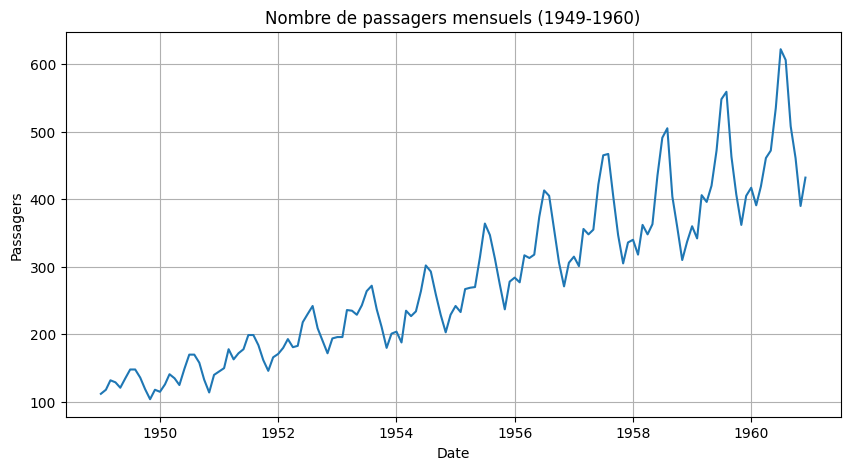

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Exemple : série AirPassengers
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data.asfreq('MS')

plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title("Nombre de passagers mensuels (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Passagers")
plt.grid()
plt.show()


In [17]:
adfuller_result = adfuller(data['Passengers'])
print(adfuller_result[1])

0.991880243437641


In [18]:
data  # Affiche les premières lignes du DataFrame

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


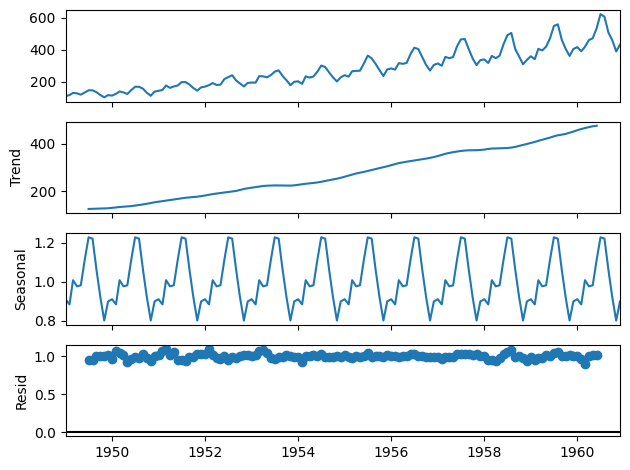

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()


In [20]:


result = adfuller(data['Passengers'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


In [21]:
data_1 = data.copy()
data_1['Passengers'] = np.log(data_1['Passengers'])

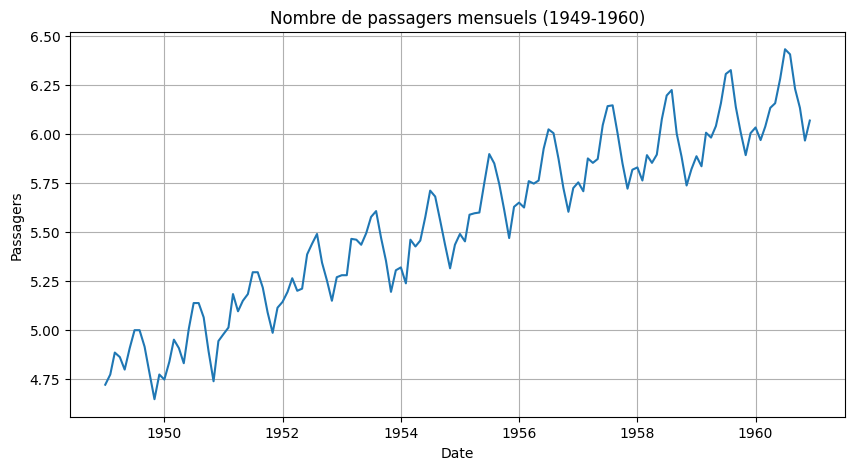

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(data_1)
plt.title("Nombre de passagers mensuels (1949-1960)")
plt.xlabel("Date")
plt.ylabel("Passagers")
plt.grid()
plt.show()

In [23]:
print(adfuller(data_1['Passengers'])[1])

0.42236677477039125


In [24]:
data_2 = data_1.diff().diff(12).dropna()
print(adfuller(data_2['Passengers'])[1])

0.00024859123113840924


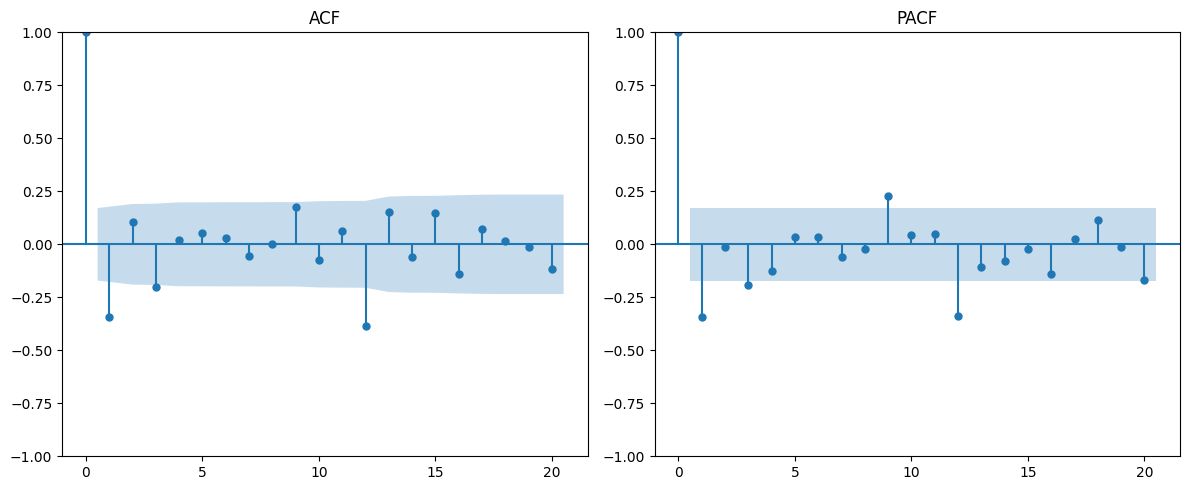

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 5))

# ACF plot (pour q)
plt.subplot(1, 2, 1)
plot_acf(data_2, ax=plt.gca(), lags=20)
plt.title("ACF")

# PACF plot (pour p)
plt.subplot(1, 2, 2)
plot_pacf(data_2, ax=plt.gca(), lags=20, method='ywm')
plt.title("PACF")

plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Sun, 24 Aug 2025   AIC                           1394.683
Time:                        14:16:28   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

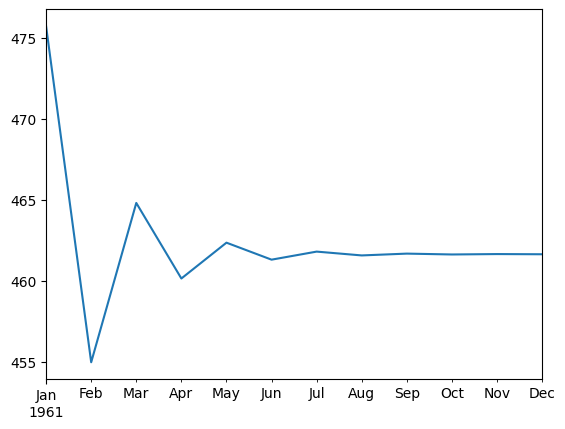

In [25]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Passengers'], order=(1,1,1))  # ARIMA(p,d,q)
model_fit = model.fit()
print(model_fit.summary())

# Prédiction
forecast = model_fit.forecast(steps=12)
forecast.plot()
plt.show()


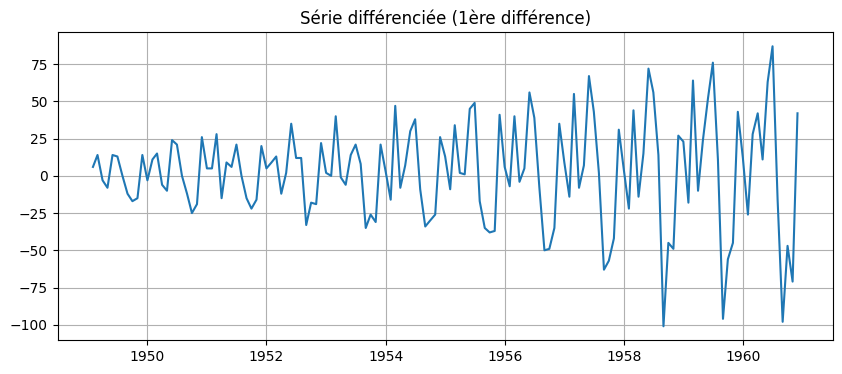

In [26]:
# Différenciation simple : X_t - X_{t-1}
data_diff = data.diff().dropna()

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(data_diff)
plt.title("Série différenciée (1ère différence)")
plt.grid()
plt.show()


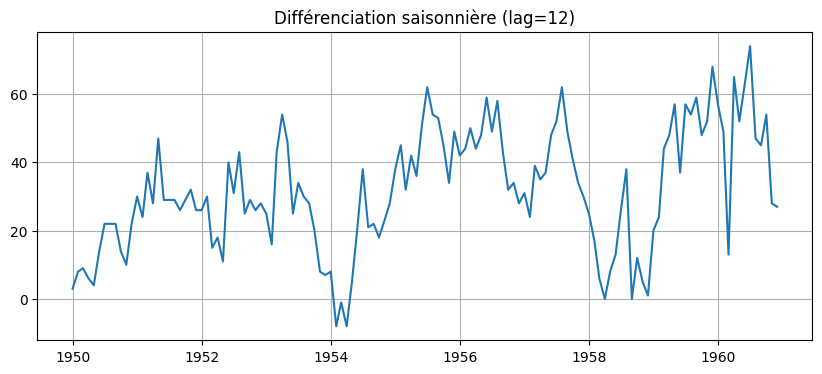

In [27]:
# Différenciation saisonnière : X_t - X_{t-12}
data_seasonal_diff = data.diff(12).dropna()

plt.figure(figsize=(10, 4))
plt.plot(data_seasonal_diff)
plt.title("Différenciation saisonnière (lag=12)")
plt.grid()
plt.show()


In [28]:


from statsmodels.tsa.stattools import adfuller

result = adfuller(data_seasonal_diff.dropna()['Passengers'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -3.383020726492481
p-value: 0.011551493085514954


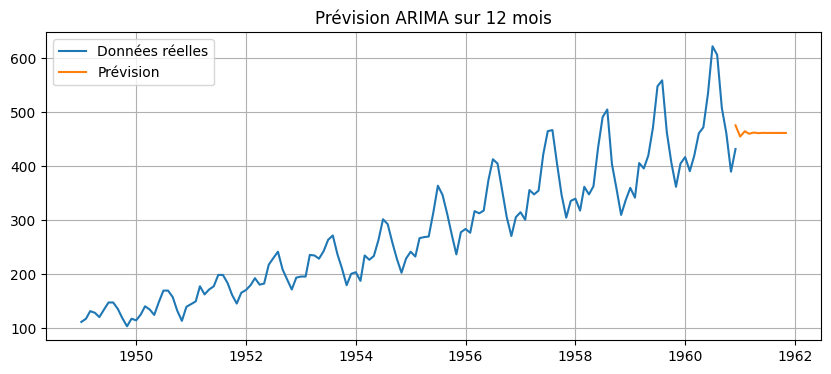

In [29]:
# Prédiction des 12 mois suivants
forecast = model_fit.forecast(steps=12)

# Affichage
plt.figure(figsize=(10, 4))
plt.plot(data.index, data['Passengers'], label='Données réelles')
plt.plot(pd.date_range(data.index[-1], periods=12, freq='MS'), forecast, label='Prévision')
plt.legend()
plt.title("Prévision ARIMA sur 12 mois")
plt.grid()
plt.show()


In [30]:
# Séparer les données
train = data.iloc[:-12]
test = data.iloc[-12:]

# Ajuster le modèle sur le train
model = ARIMA(train['Passengers'], order=(1,1,1))
model_fit = model.fit()

# Prédiction
forecast = model_fit.forecast(steps=12)

# Évaluation
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE =", rmse)


RMSE = 91.22883941630958


In [31]:
data.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


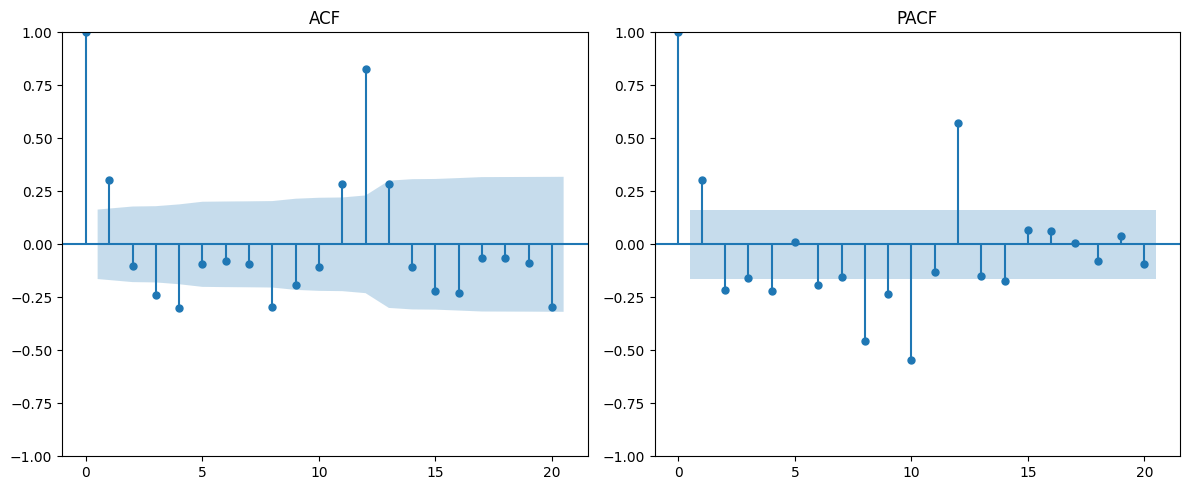

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 5))

# ACF plot (pour q)
plt.subplot(1, 2, 1)
plot_acf(data_diff, ax=plt.gca(), lags=20)
plt.title("ACF")

# PACF plot (pour p)
plt.subplot(1, 2, 2)
plot_pacf(data_diff, ax=plt.gca(), lags=20, method='ywm')
plt.title("PACF")

plt.tight_layout()
plt.show()
